##Clusterização

O  objetivo deste documento é apresentar um projeto simples de análise de um dataset para forneceer insights sobre o comportamento dos dados. Ao fim, por meio do algorimto de clisterização K-means, é criado um modelo de machine learning simples e sem a "tunação" dos hiperparâmetros. Escrevo em português ao invés do inglês porque sinto falta de bons materiais em português e principalmente por muitas pessoas sentirem que o inglês é uma barreira para o aprendizado. Espero que gostem. Quaisquer pontuações, correções e comentários é só me acionar. Não tomem por 100% verdade aqui as coisas que escrevo, sempre duvidem e questionem. Bom proveito!

Este conjunto de dados foi importado do Kaggle é adaptado do Wine Data Set de https://archive.ics.uci.edu/ml/datasets/wine, removendo as informações sobre os tipos de vinho para aprendizado não supervisionado.

As seguintes descrições são adaptadas da página da UCI:

Esses dados são resultados de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos.

Os atributos são:

- Álcool (Alcohol)
-Ácido málico  (Malic acid)
- Cinzas  (Ash)
- Alcalinidade das cinzas (Alcalinity of ash)
- Magnésio (Magnesium)
- Fenóis totais (Total phenols)
- Flavonóides (Flavanoids)
- Fenóis não flavonóides (Nonflavanoid phenols)
- Proantocianinas (Proanthocyanins)
- Intensidade da cor (Color intensity)
- Matiz (Hue)
- DO280/OD315 de vinhos diluídos (OD280/OD315 of diluted wines)
- Prolina (Proline)

Vamos as análises e ao modelo!

Inicialmente, devemos conectar com o Google Drive uma vez que deixei lá o dataset:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aqui um comentário importante: a biblioteca para plotar os gráficos que usarei será o plottly. Infelizmente, o GitHub não consegue renderizar essa biblioteca e para isso devemos baixar essa outra biblioteca e ao invés de usarmos o comando "fig.show()", usaremos o "fig.show(renderer="png")". Dessa forma, as imagens serão renderizadas de maneira estática e não como aqueles gráficos interatvos bacanas que essa biblioteca oferece, mas tudo bem. Seguimos.

In [2]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Vamos importando conforme a necessidade:

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Aparentemente tudo certo com os dados. É um dataset bem pequeno.

O comando "info" nos dá uma visão geral do dataset: quantos valores não nulos temos em cada coluna e qual o tipo de dado lá presente.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


O comando "shape" nos dá as dimensões dos dados: nesse caso, temos 13 colunas para 178 linhas.

In [6]:
df.shape

(178, 13)

O "describe" pega todas as variáveis NUMÉRICAS e nos traz as principais medidas estatísticas como:

- contagem - quantos valores tem daquela feature
- mean - média dos valores da feature
- std - desvio padrão
- min - valor mínimo encontrado
- 25% - valor do primeiro quartil (em um boxplot)
- 50% - mediana
- 75% - valor do terceiro quartil
- max - valor máximo dos dados daquela feature

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Vamos as análises inciais:

- Para a variável de teor álcoolico, tudo certo, os dados variam entre ~11 e ~14. Faz sentido.
- Todas as outras variáveis tem intervalos plausíveis e na mesma ordem de grandeza.
- Todas as colunas parecem completas
- Não tem nenhum valor = 0, que às vezes dá problema em variáveis não binárias.

Maravilha.

Vamos conferir se não temos valores vazios mesmo com o comando "isnull":

In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Realmente, sem dados faltantes.

Vamos à Análise Exploratória:

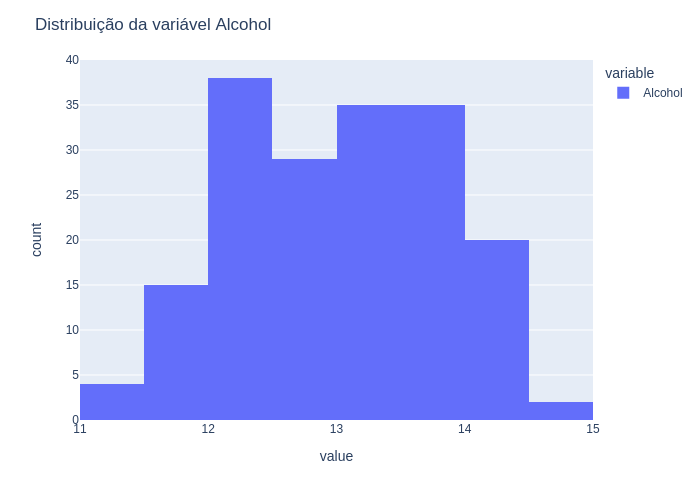

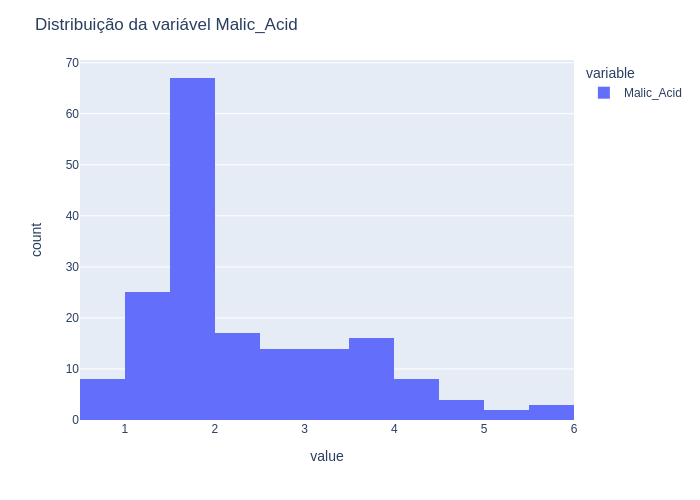

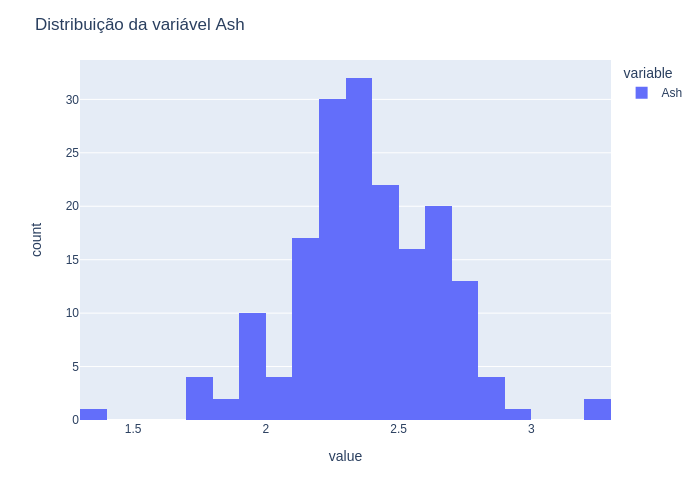

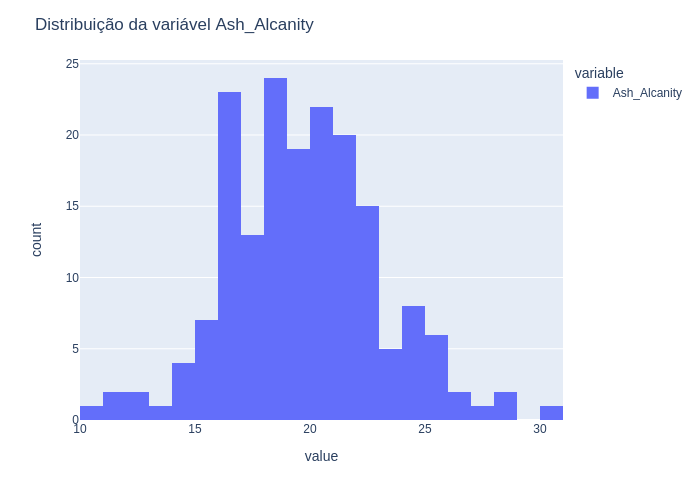

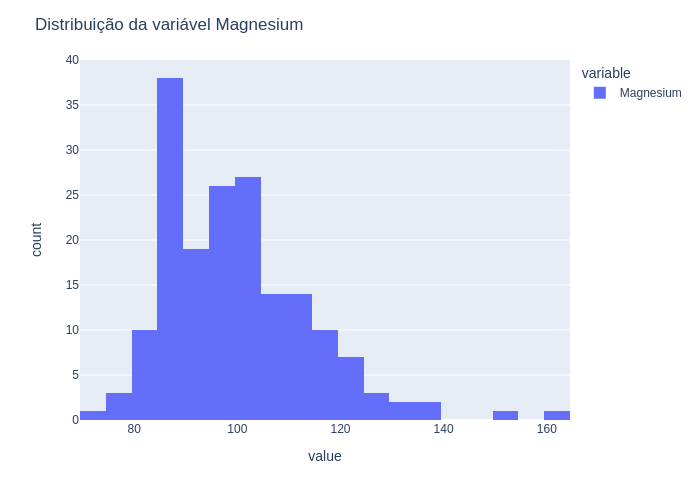

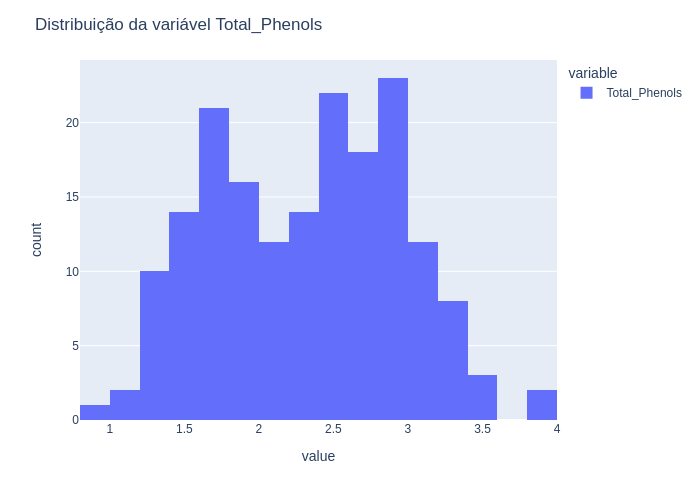

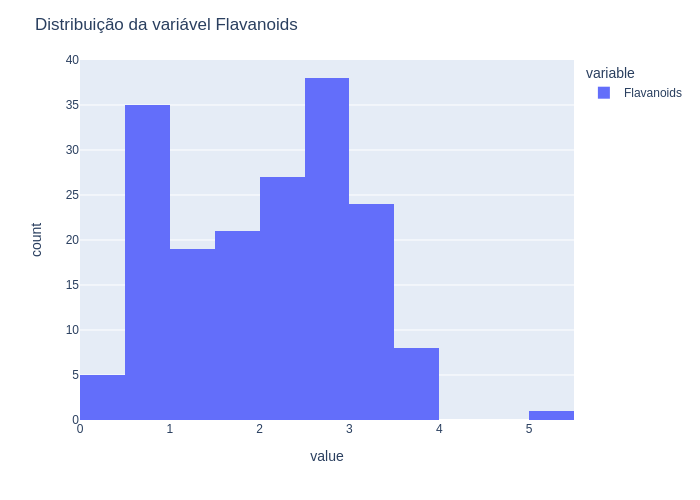

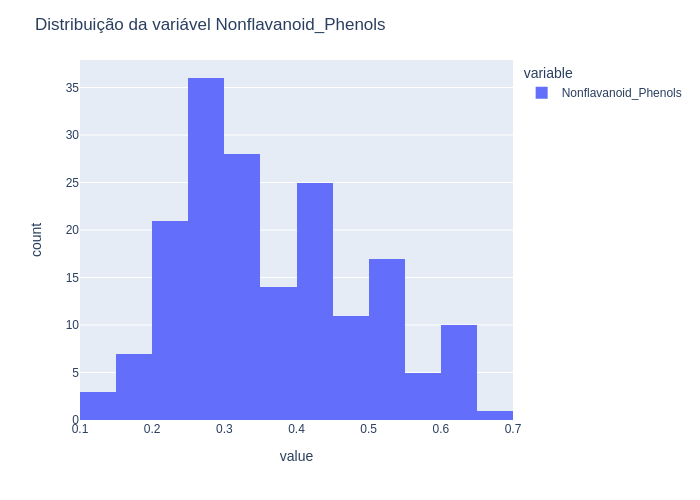

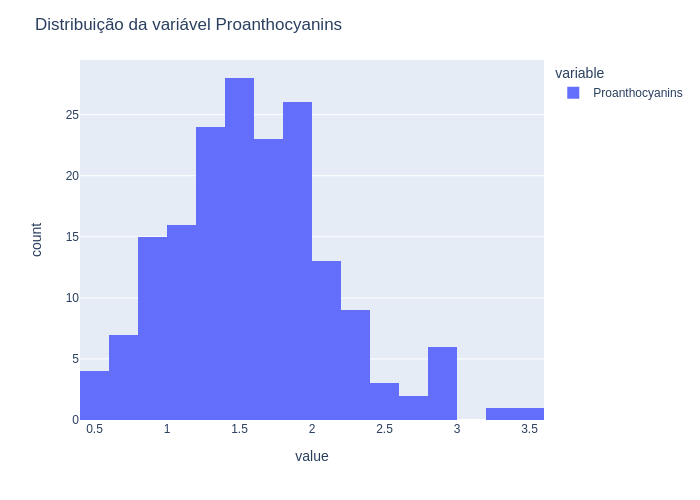

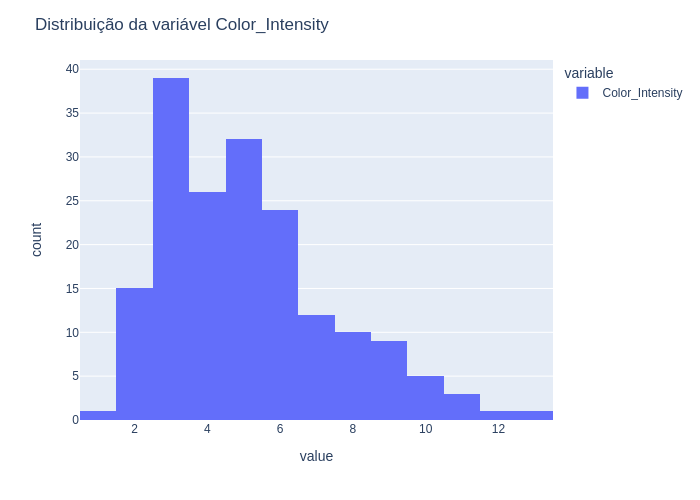

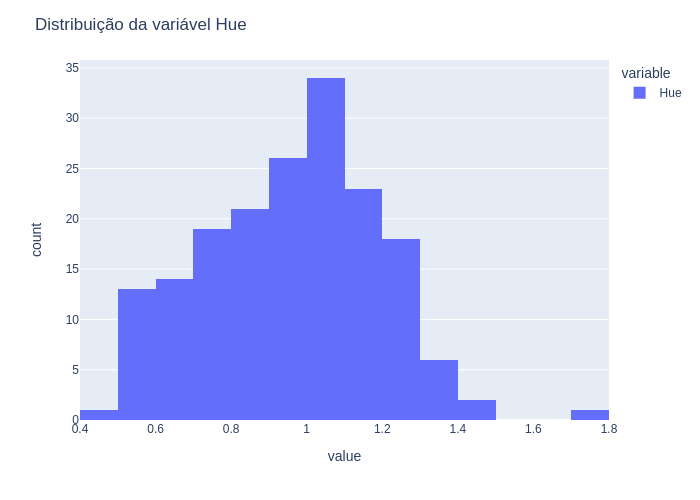

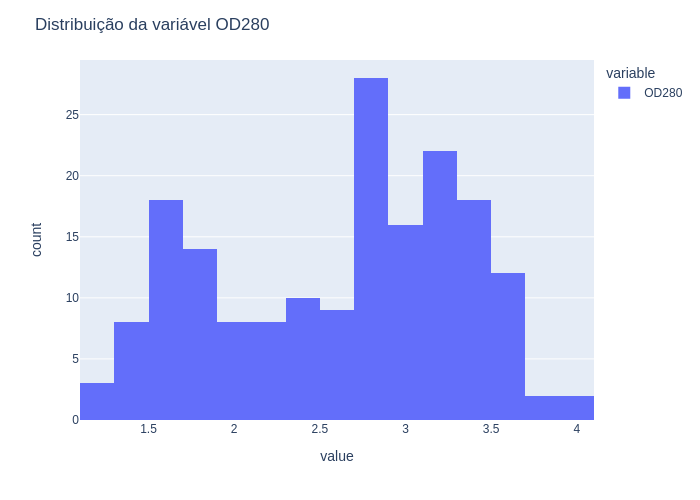

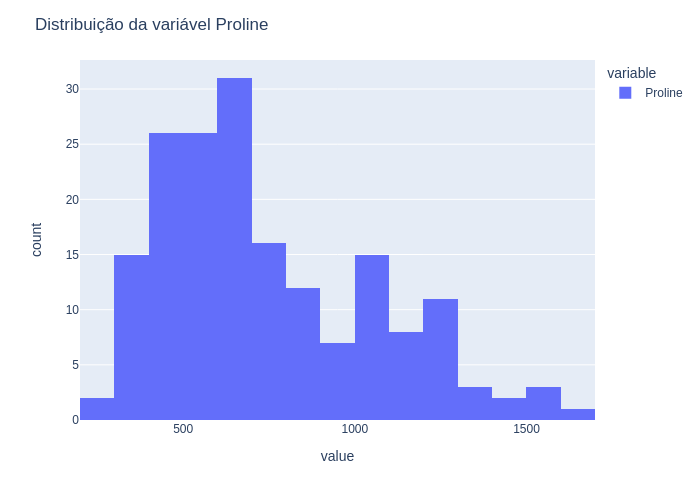

In [7]:
import plotly.express as px
import plotly.graph_objects as go
for x in df:
  fig = px.histogram(df[x])
  fig.update_layout(title=f'Distribuição da variável {x}') 
  fig.show(renderer="png")
  #fig.write_image("figure.png", engine="kaleido")

O teor alcóolico esboça seguir uma distribuição normal, o maior teor alcóolico presente no dataset é o de valor 12, que suponho ser 12%. Em seguida empatados temos 13 e 13.5%, com 35 exemplares cada. De qualquer forma, o teor álcoolico do vinho vai de 11% a 15%.

O "Ácido Malico" (Malic Acid) também apresenta que se aproxima de uma normal, com o intervalo com valor de maior ocorrência sendo de 1.5 a 1.99.

Os histogramas seguem para todas as features do dataset e todas parecem seguir uma distribuição normal, uma mais claras outras nem tanto.

Vamos comparar as curvas estatísticas de algumas features:

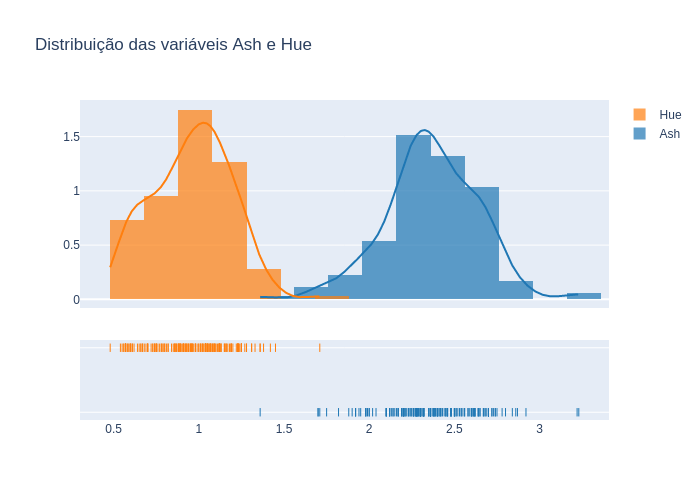

In [8]:
import plotly.figure_factory as ff

x1 = df['Ash']
x2 = df['Hue']


hist_data = [x1, x2]

group_labels = ['Ash', 'Hue']

fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.update_layout(title='Distribuição das variáveis Ash e Hue') 
fig.show(renderer="png")

Como podemos observar no gráfico acima, a variável Ash (cinzas) tem seu menor valor com 1.36 e seu maior 3.23 (são dois outliers). O intervalo de maior ocorrência é o de 2.16 até 2.35. 

Já a variável Hue (matiz) tem seus valores variando de 0.48 até 1.45. Os valores de maior ocorrência estão no intervalo de 0.88 à 1.07. Vamos aumentar o número de divisões do histograma para ver a fundo esse intervalo:

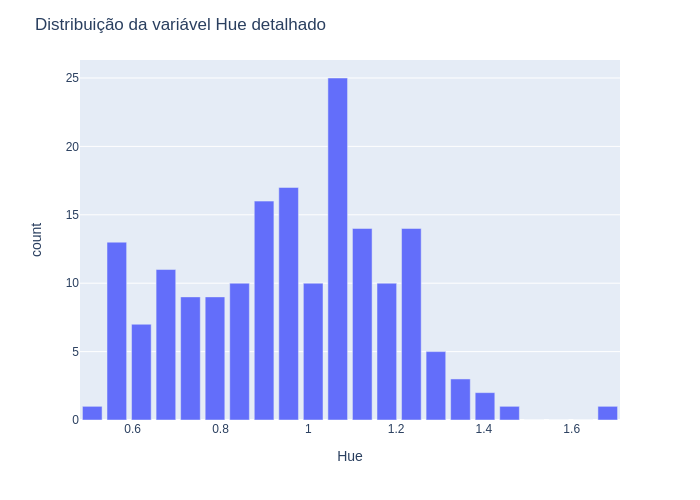

In [9]:
import numpy as np

counts, bins = np.histogram(df['Hue'], bins=22)
bins = 0.5 * (bins[:-1] + bins[1:])

fig = px.bar(x=bins, y=counts, labels={'x':'Hue', 'y':'count'})
fig.update_layout(title='Distribuição da variável Hue detalhado') 
fig.show(renderer="png")

Interessante, o valor que mais ocorre é o de 1.06 (25 vezes), seguido de 0.9, que acontece 17 vezes.

Vamos analisar agora a distribuição das únicas variáveis com valores interios do dataset:

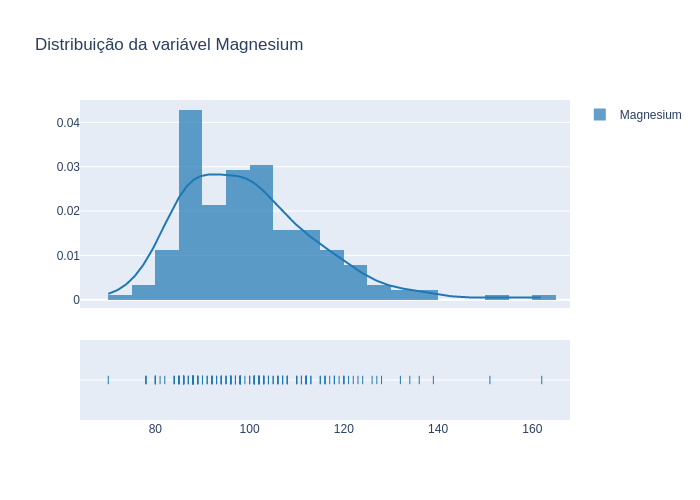

In [10]:
x3 = df['Magnesium']

hist_data = [x3]

group_labels = ['Magnesium']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
fig.update_layout(title='Distribuição da variável Magnesium') 
fig.show(renderer="png")

O intervalo é maior, podemos observar que o valor máximo da variável Magnésio é de 162 e o mínimo 70. Mas a curva esboça uma normal.

In [ ]:
x4 = df['Proline']

hist_data = [x4]

group_labels = ['Proline']

fig = ff.create_distplot(hist_data, group_labels, bin_size=50)
fig.update_layout(title='Distribuição da variável Proline') 
fig.show()

O intervalo para a variável Profile é ainda maior e o valor de maior ocorrência é 478 - 527, mas ainda assim os dados nessa variável são muito variáveis e distribuídos ao longo do intervalo.

E realmente, se temos 178 amostras apenas e um intervalo com a possibilidade de 1402 (máx: 1608 - mín: 278) possibilidades (os números são inteiros), faz sentido que a probabilidade de haver valores repetidos seja baixa.

Vamos analisar outras variáveis com outras ferramentas agora:

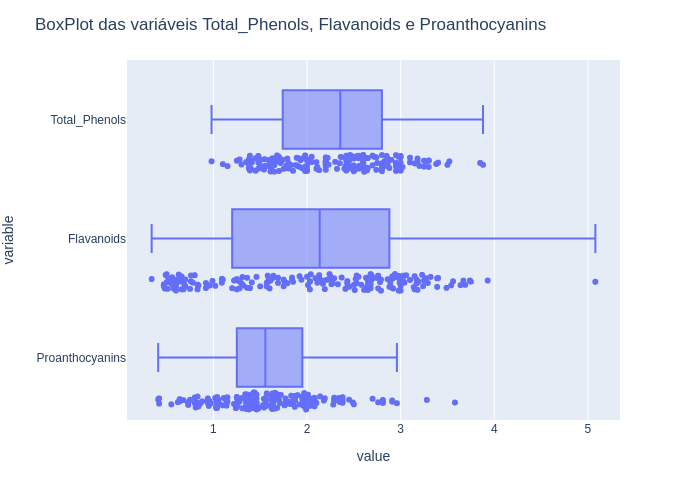

In [11]:
fig = px.box(df, x=["Proanthocyanins", "Flavanoids", "Total_Phenols"], points="all")
fig.update_layout(title='BoxPlot das variáveis Total_Phenols, Flavanoids e Proanthocyanins') 
fig.show(renderer="png")

Escolhi variáveis com ordens de grandeza parecidos justamente para podermos observar em melhor escala os resultados.

O que podemos extrair desse BoxPlot na verdade são alguns outliers: na variável Flavanoids, o máximo valor é de 5.08 e é visível que ele foge a regra: a vasta maioria se encontra entre o primeiro e o terceiro quartil.

Vamos avaliar agora o comportamento de outras variáveis com o gráfico de dispersão:

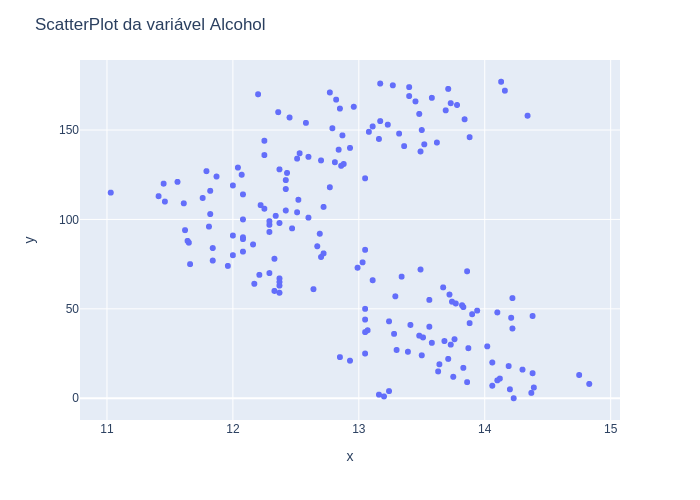

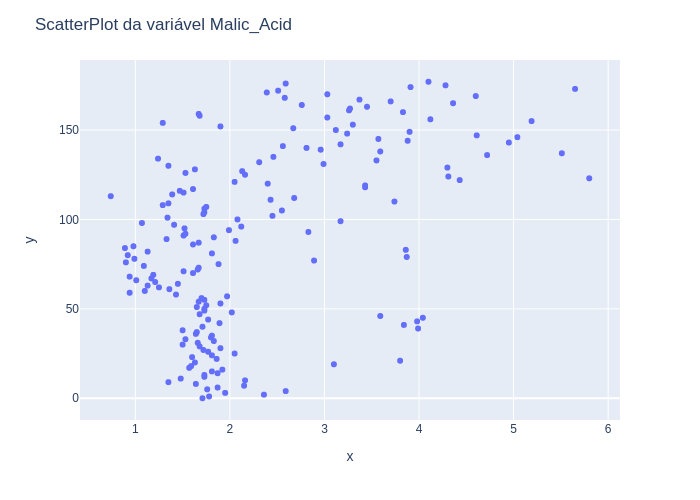

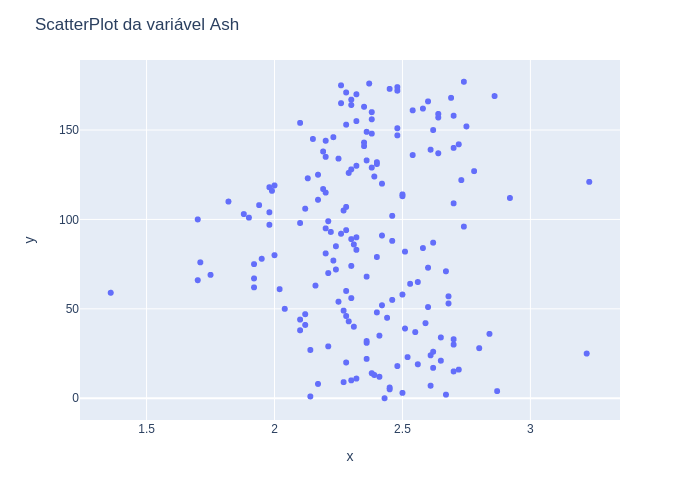

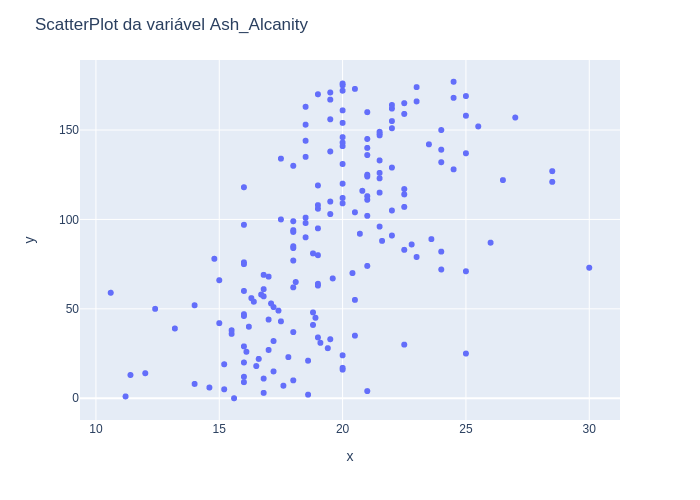

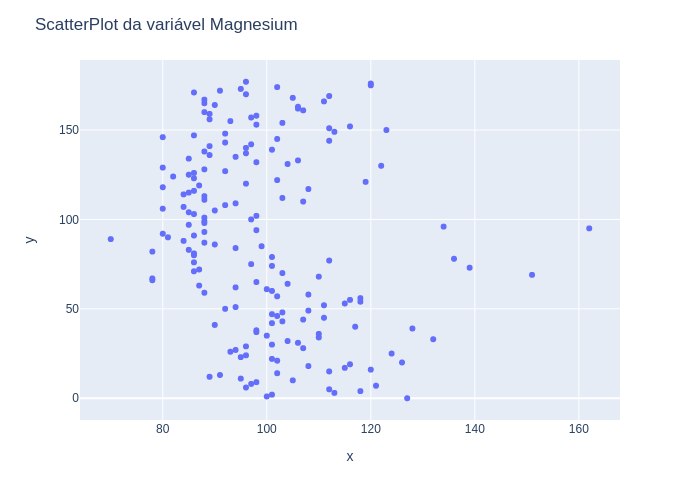

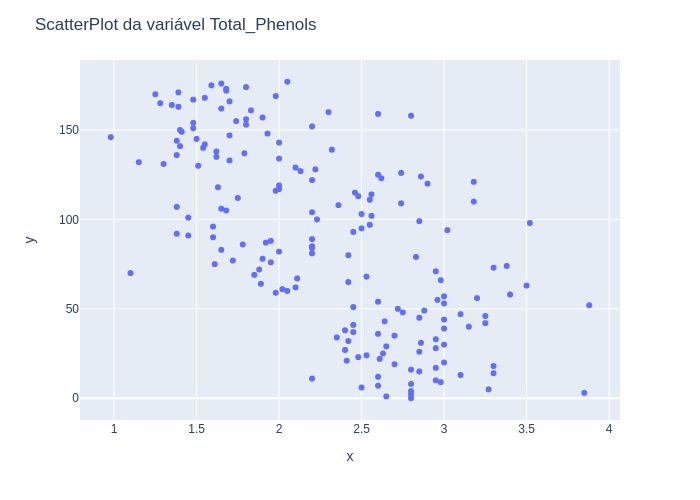

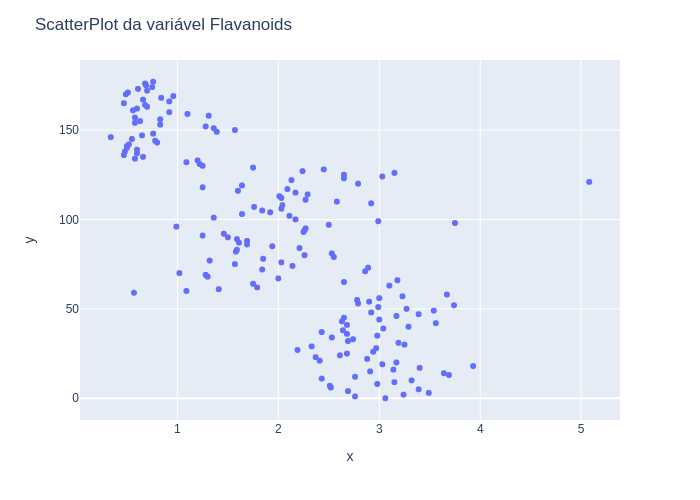

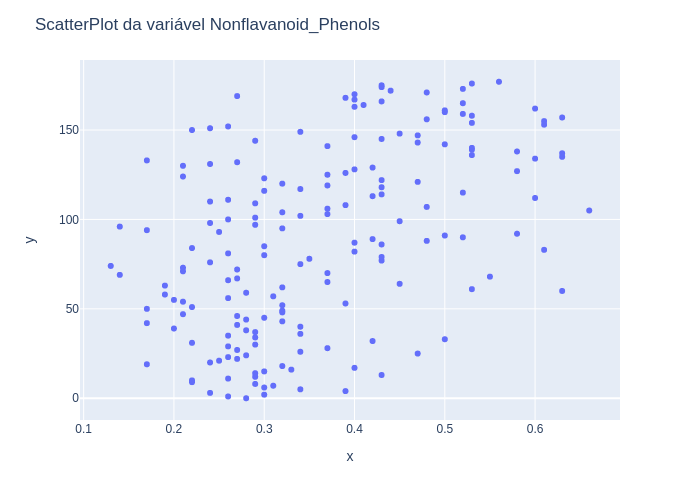

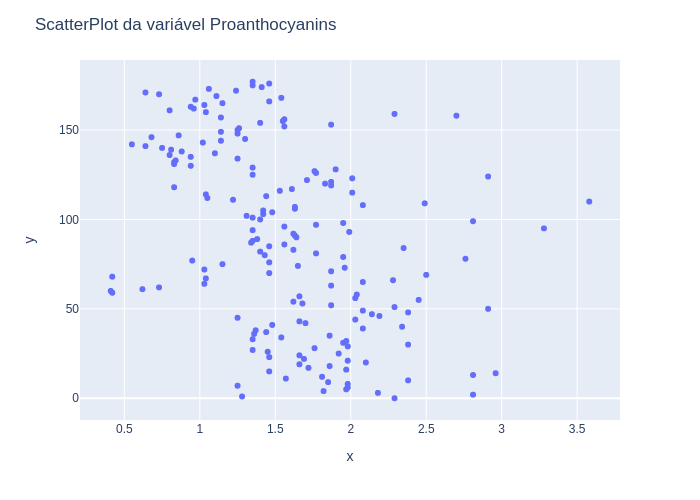

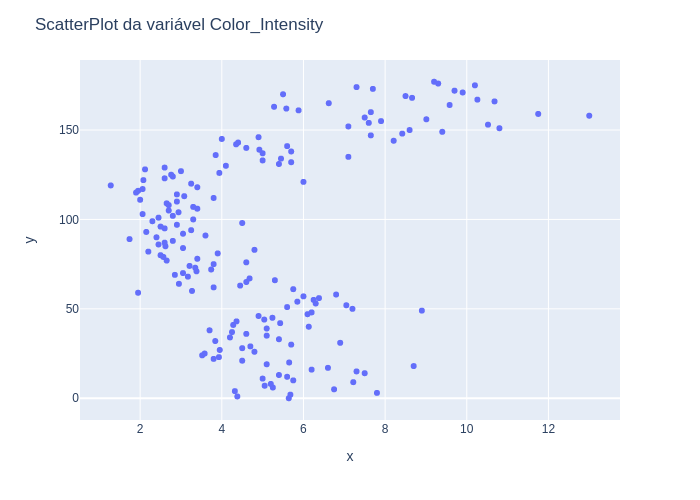

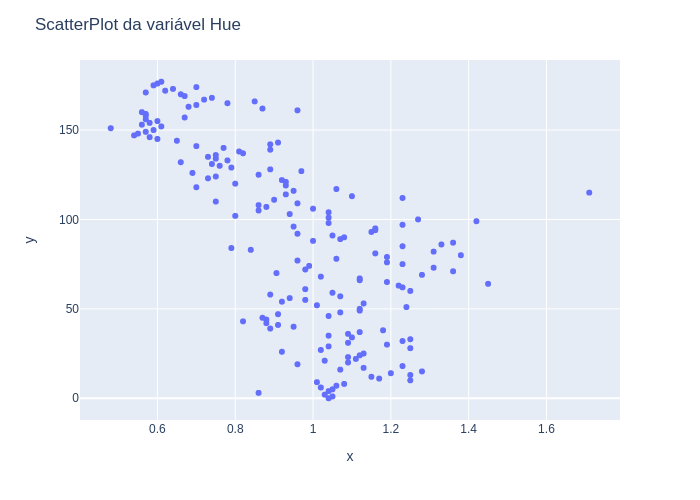

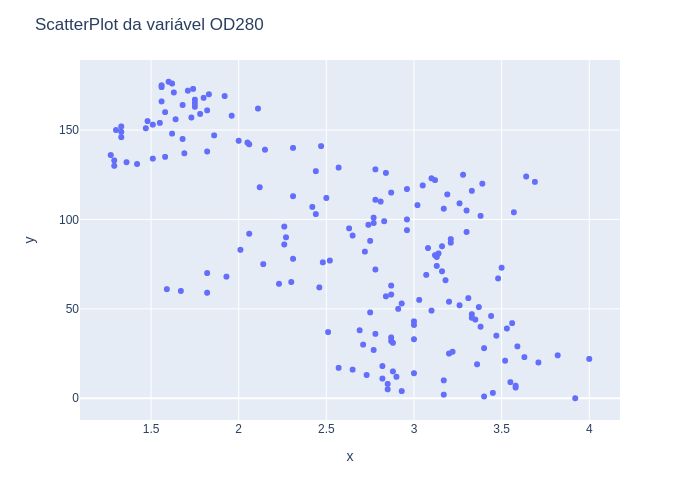

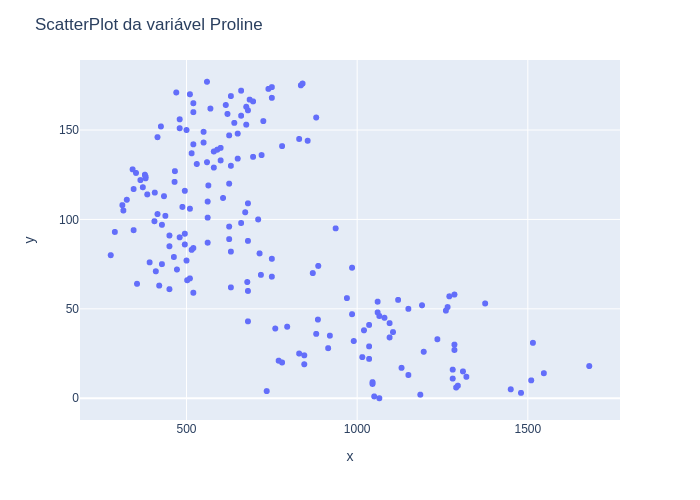

In [13]:
for x in df:
  fig = px.scatter(x=df[x])
  fig.update_layout(title=f'ScatterPlot da variável {x}') 
  fig.show(renderer="png")

As únicas variaveis que não apresentaram um comportamento completamente aleatório foram a Ash_Alcalinity, Total_Phenols, Flavanoids, Hue, Od280 e Proline, que se aproximam (ainda que pouco) de uma curva linear. Isso significa que existe um padrão, um comportamento nos dados.

Ainda assim, visualmente é difícil definir clusters, mas, por exemplo, na variável Alcohol, os dados parecem estar basicamente em 3 pontos, vamos analisar a fundo essa variável:

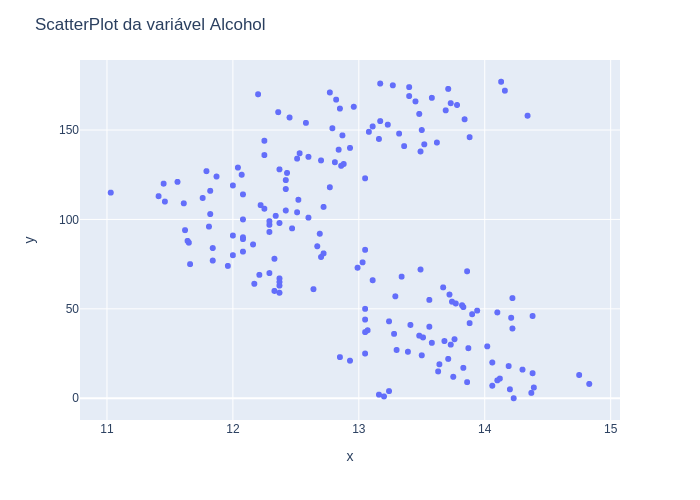

In [14]:
fig = px.scatter(x=df['Alcohol'])
fig.update_layout(title=f'ScatterPlot da variável Alcohol') 
fig.show(renderer="png")

Se tivéssemos um K igual a 3, por exemplo (ou seja, 3 possibilidades de separar os dados), a variável Alcohol provavelmente teria um centróide localizado perto de (12, 100), outro em (13.7, 33) e o último em (13, 149), que dividiria os dados em 3. Óbvio que isso é só uma suposição.

O que é interessante de se extrair de scatterplots é a relação dos dados. Por mais que não estejamos no gráfico acima comparando a variável álcool com nenhuma outra (no eixo y temos o índice), é possível notar que os dados seguem um padrão: até perto do índice 75, a variável álcool assume teor superior a 13%. 

Temos que tomar cuidado com isso porque muitas vezes, quando plotamos a variável em relação ao índice, o comportamento pode se dar por conta do jeito que os dados foram preenchidos/coletados no dataset. Se, por exemplo, foram primeiro preenchidos vinhos com teor álcoolico 11%, depois 12%, depois 13% e assim por diante, é claro que haverá uma distinção nos dados. Então só precisamos ter isso em mente.

Do índice ~75 ao ~145, o teor oscila entre ~11% (outlier) e ~12.75%.

Por fim, registros com índice acima de ~150 variam entre ~12.5% e ~14.5%. Bem bacana, fica bem visual a divisão dos dados.

Vamos ao modelo de uma vez por todas.

In [15]:
from sklearn.cluster import KMeans 

Agora que importamos o algoritmo, o modelo em si é bem simples. 

Mas antes, vamos provar porque os dados precisam ser antes normalizados:

In [16]:
df[['Alcohol', 'Hue', 'Nonflavanoid_Phenols']].describe()

,Alcohol,Hue,Nonflavanoid_Phenols
count,178.000000,178.000000,178.000000
mean,13.000618,0.957449,0.361854
std,0.811827,0.228572,0.124453
min,11.030000,0.480000,0.130000
25%,12.362500,0.782500,0.270000
50%,13.050000,0.965000,0.340000
75%,13.677500,1.120000,0.437500
max,14.830000,1.710000,0.660000


Dos 3 features acima, 2 tem ordens de grandeza parecida enquanto um terceiro já foge para dezena, e esse nem é o exemplo mais fora. Vamos rodar o algoritmo e plotar os centróides que graficamente a gente pode ver como o centróide da feature mais deslocada está mais distante no gráfico e isso pode afetar o modelo.

Em outras palavras, a normalização dos dados será importante para garantir que a medida de distância atribua peso igual a cada variável. Sem normalização, a variável com maior escala dominará a medida e afetará os dados.

In [17]:
dftest = df[['Alcohol', 'Hue', 'Nonflavanoid_Phenols']]
kmeans2 = KMeans(n_clusters = 5,init = 'k-means++', n_init = 10, max_iter = 300) 
pred_x = kmeans2.fit_predict(dftest)
kmeans2.cluster_centers_

array([[12.35829787,  0.99821277,  0.40170213],
       [13.6747619 ,  0.97452381,  0.33809524],
       [13.05711111,  0.83711111,  0.36755556],
       [14.26181818,  1.00090909,  0.31772727],
       [11.70909091,  1.04045455,  0.35454545]])

Já dá para observar nos centróides que enquanto o intervalo das duas últimas coordenadas é entre 1.06 e 0.31, o da primeira é na casa da dezena.

No gráfico interativo abaixo ao mexermos podemos observar como um centróide está deslocado em relação aos outros:

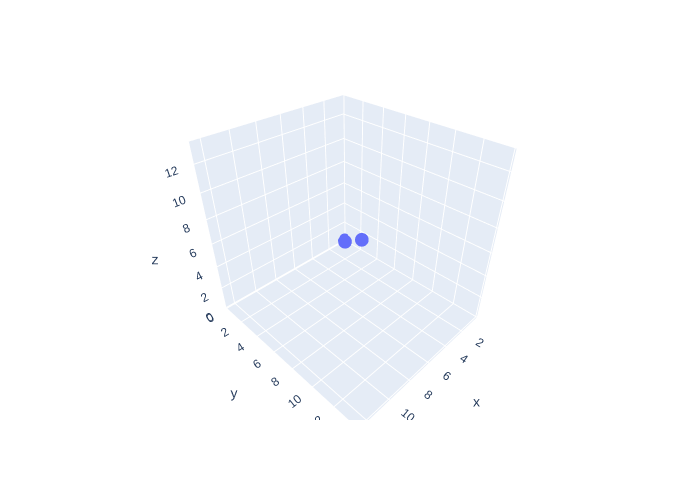

In [19]:
fig = px.scatter_3d(dftest, x=kmeans2.cluster_centers_[0], y=kmeans2.cluster_centers_[1], z=kmeans2.cluster_centers_[2],)
fig.show(renderer="png")

Esse gráfico não ficou legal porque ele é em 3D. Mas temos 2 centróides muito próximos e um mais distante, pena que não dá para ver.

Vamos normalizar os dados, para isso vamos usar a função do numpy pronta já:

In [20]:
from sklearn import preprocessing

normalized_df = preprocessing.normalize(df)

normalized_df

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, ...,
        9.69434383e-04, 3.65402190e-03, 9.92738094e-01],
       [1.25128005e-02, 1.68733218e-03, 2.02859038e-03, ...,
        9.95336401e-04, 3.22299406e-03, 9.95336401e-01],
       [1.10630135e-02, 1.98394467e-03, 2.24454758e-03, ...,
        8.65874158e-04, 2.66487484e-03, 9.96175609e-01],
       ...,
       [1.57227449e-02, 5.07108879e-03, 2.67772446e-03, ...,
        6.99051960e-04, 1.84834078e-03, 9.89336248e-01],
       [1.55136606e-02, 3.05090212e-03, 2.79175213e-03, ...,
        7.06772691e-04, 1.90828627e-03, 9.89481768e-01],
       [2.48340486e-02, 7.20591644e-03, 4.81566123e-03, ...,
        1.07209976e-03, 2.81206495e-03, 9.84222734e-01]])

Vamos converter esse array numpy em um dataframe pandas novamente e renomear as colunas:

In [21]:
columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
normalized_df = pd.DataFrame(normalized_df, columns = columns)
normalized_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482


Continuamos com as 178 linhas e 13 colunas, apenas com os valores normalizados de diferença. Percebamos a diferença para a feature Magnesium:

In [22]:
print(df['Magnesium'].describe())
(print("----------------------------"))
print(normalized_df['Magnesium'].describe())

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnesium, dtype: float64
----------------------------
count    178.000000
mean       0.151541
std        0.054081
min        0.064147
25%        0.109775
50%        0.146777
75%        0.183082
max        0.297958
Name: Magnesium, dtype: float64


Perfeito, agora não corremos o risco de variáveis com valores altos influenciarem em nada.

Agora vamos achar o número ideal de clusters a serem criados.
Sabemos que esse dataset foi alterado de um conjunto de dados supervisionado e por conta disso sabemos que havia 13 possibilidades de vinho, mas vamos ver quanto clusters chegaríamos usando o "método do cotovelo" (ou "elbow method").

Para determinar o número de clusters para o algoritmo a ser usado, devemos usar um gráfico da soma dos quadrados nos grupos, por número de clusters extraídos. O número correto de clusters a ser usado estará na curva ou no "cotovelo" do gráfico.

A ideia é rodar o KMeans para várias quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters. O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Então é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

Como o KMeans calcula a distância das observações até o centro do agrupamento que ela pertence, o ideal é que essa distância seja a menor viável. Matematicamente falando, nós estamos buscando uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para wcss) seja a menor possível, sendo zero o resultado ótimo.

O KMeans do scikit-learn já calcula o wcss pra gente e dá o nome de inertia (inércia). Existe um ponto negativo que precisamos levar em consideração quanto a inércia, que é que ela não é uma métrica normalizada, então como estamos em um espaço com muitas dimensões as distâncias ficariam infladas se não tivéssemos normalizado os dados.

Vamos implementá-lo:

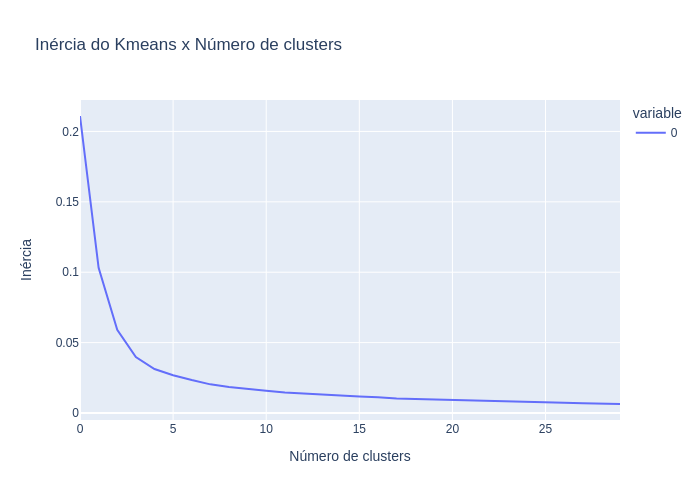

In [24]:
scores = [KMeans(n_clusters=i+2).fit(normalized_df).inertia_ 
          for i in range(30)]

fig = px.line(scores, title= 'Inércia do Kmeans x Número de clusters',)
fig.update_layout(xaxis_title="Número de clusters", yaxis_title="Inércia")
fig.show(renderer="png")

Legal, e para tirar de fato o número ideal de cluster precisamos achar o ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters, ou seja, o ponto da curva mais distante de uma reta traçada entre os pontos em que x=0 ("cluster 0") e x=30 ("cluster 30"). 

A olho nu, acho que o k = 7 seria um bom palpite.

In [25]:
kmeans = KMeans(n_clusters = 7,init = 'k-means++') 
pred_y = kmeans.fit_predict(normalized_df)
normalized_df['clusters'] = pred_y

Os hiperparâmetros setados acima são o número de clusters que queremos e o "init", que é o método para inicialização e o ‘k-means++’  seleciona centros de cluster iniciais para clustering k-mean de forma inteligente para acelerar a convergência (scikit-learn documentation).

Além disso adicionamos uma última coluna com a classificação dada pelo algoritmo.

Como temos 13 dimensões, não dá para visualizar um gráfico bacana com todas as variáveis, mas podemos observar por exemplo as variáveis em gráficos de dispersão:

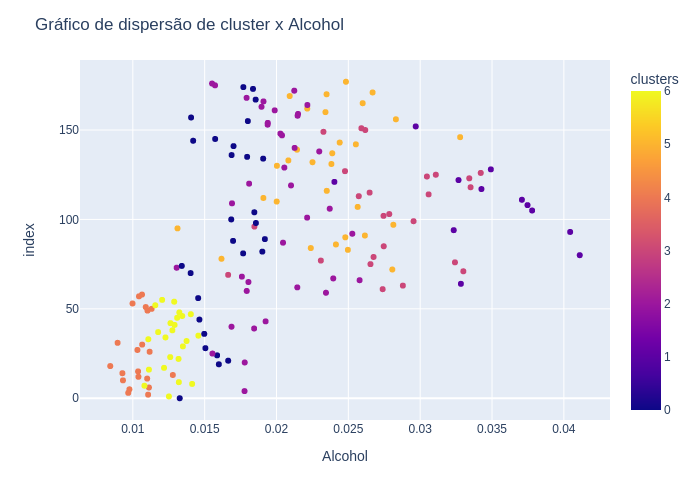

In [27]:
fig = px.scatter(normalized_df, x="Alcohol", color="clusters")
fig.update_layout(title='Gráfico de dispersão de cluster x Alcohol')
fig.show(renderer="png")

Acima a gente pode ver que o algoritmo teve muito mais facilidade para definir os clusters 3 e 4, que são as regiões do gráfico de cor homogênea, ou seja:

Vinhos clusterizados do tipo 3 tem teor álcoolico perto de 0.01 enquanto do tipo 4 próximo a 0.0125. É claro que esses valores tão normalizados então não correspondem ao valor real.

Além disso, o teor álcoolico de vinhos classificados com 6 são mais heterogêneos e podem assumir vários valores diferentes, assim como os tipos 0 e 1. Vinhos do tipo 5 assumiram valores apenas superiores a 0.024, mas esse parece ser um ponto fora da curva e a suma maioria está acima de 0.0296. 

Bem interessante.

Vamos a outras variáveis:

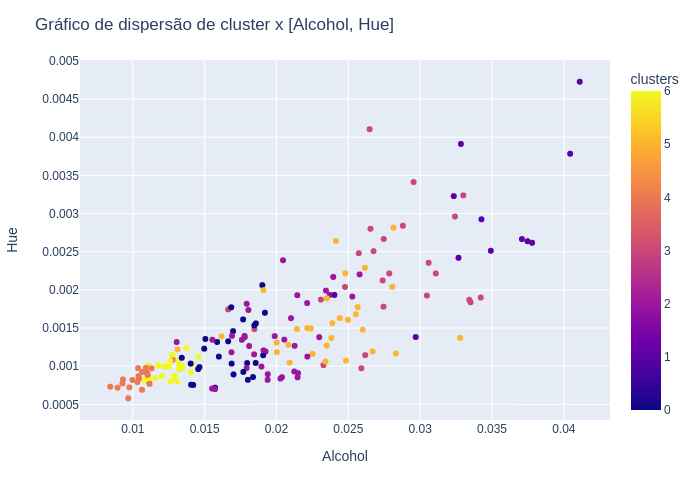

In [28]:
fig = px.scatter(normalized_df, x="Alcohol", y="Hue", color="clusters")
fig.update_layout(title='Gráfico de dispersão de cluster x [Alcohol, Hue]')
fig.show(renderer="png")

Olha que interessante: 

Parece que o algoritmo teve mais facilidade para identificar os clusters 0 e 6 quando se tratava da variável álcool e matiz. Isso porque a cor azul escura e amarela são as que mais se encontram de maneira homogênea no gráfico.

Vinhos do tipo 5 tem a variável normalizada Alcohol maior que ~0.03, enquanto  os vinhos com tipo 2 e 1, novamente, ficaram mais espalhados e tem seus valores oscilando muito mais, apresentando um comportamento muito mais heterogêneo do que homogêneo.

Mas de maneira geral, conforme aumentamos o teor álcoolico, aumentamos também a matix e justamente por isso, novamente, vinhos do tipo 5 que tem teor álcoolico superior a ~0.03 tem também os maiores valores para matiz, superior a 0.0025, aproximandamente.

Vamos ver outras duas variáveis:

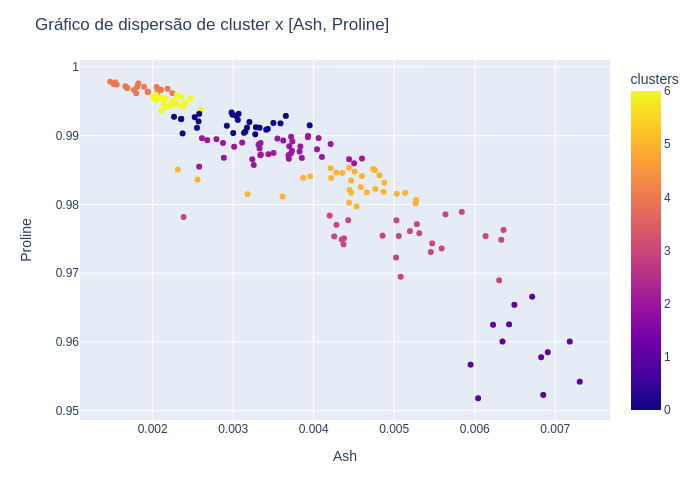

In [30]:
fig = px.scatter(normalized_df, x="Ash", y="Proline", color="clusters")
fig.update_layout(title='Gráfico de dispersão de cluster x [Ash, Proline]')
fig.show(renderer="png")

Interessante.

O algoritmo achou mais fácil os clusters para esses features, isso porquê as cores se dividem de maneira homogênea no gráfico, ou seja, os clusters tem valores muito bem definidos quando tratamos das variáveis Ash e Proline.

Esse gráfico interessante nos revela também uma linearidade: conforme a variável Ash aumenta, a variável proline diminui. Dessa maneira:
- Vinhos do tipo 3, que tem os valores mais baixos de Ash, tem os maiores valores de proline;
- VInhos do tipo 4 tem o menor intervalo para valores de Ash, ou seja, entre ~0.0022 e ~0.0024 a chance daquele vinho ser do tipo 4 é praticamente 100% (existe um ponto azul nesse intervalo - cluster = 0, mas o tipo 0 tem um intervalo maior e está mais disperso no gráfico, assim como o tipo 6 (amarelo)).
- Vinhos do tipo 5, os laranjas, tem claramente menos exemplares e são os que apresentam os menores valores de proline: abaixo de proline ~0.96 todos os vinhos são do tipo 5 e acima de ash ~0.006 quase todos são desse tipo também.

Esse gráfico foi bem informativo.

Vamos ver mais algumas e adicionar um elemento:

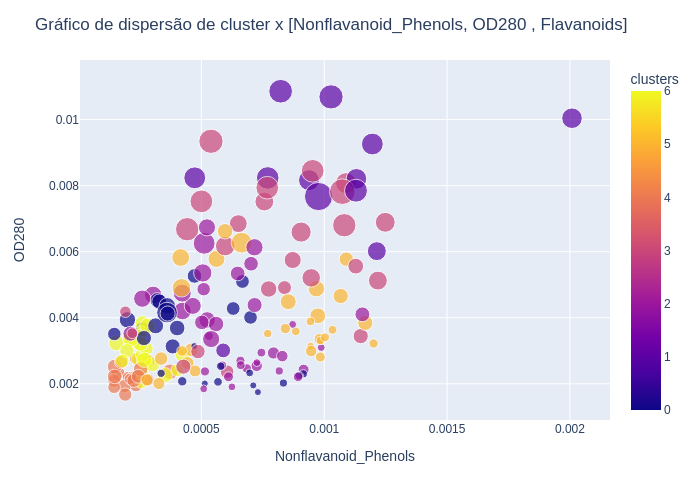

In [31]:
fig = px.scatter(normalized_df, x="Nonflavanoid_Phenols", y="OD280", size="Flavanoids", color="clusters")
fig.update_layout(title='Gráfico de dispersão de cluster x [Nonflavanoid_Phenols, OD280 , Flavanoids]')
fig.show(renderer="png")

Também parece que o algoritmo conseguiu distinguir bem.

O que temos que analisar aqui é se as cores iguais estão juntas no gráfico. Se sim, como é o caso do azul escuro e amarelo, clusters 0 e 6 respectivamente, por exemplo, significa que esses vinhos tem valores (ou intervalos de valores) de OD280 e Nonflavanoids_Phenol muito bem definidos. Além disso, a outra análise é se bolhas de tamanhos iguais tem as mesmas cores. Se sim, significa que a variável Flavanoids está bem definida nos clusters també, como é novamente o caso das cores azul e amarela: veja que não existe bolhas muito grandes nem muito pequenas para essas cores e elas tem praticamente um único tamanho no gráfico.

Dessa forma:
- Vinhos do tipo 3 são os que apresentam os menores valores na média da variável Nonflavanoid_Phenols e OD280. Além disso, por apresentarem bolinhas de tamanho praticamente igual, siginifca que o tipo 3 tem a variável flavanoids entorno de 0.0023 na média, tá bem homogêneo.
- Vinhos do tipo 4 se parecem com o do tipo 3, só com valores, para todas as variáveis, um pouco superiores: mas, no geral, Nonflavanoid_Phenols não passa de ~274, OD280 não passa de ~259 e flavanoids ~0.0024. Esse vinho tá bem segmentado também.
- Em compensação, o vinho do tipo 6 tem um intervalo maior para todas as variáveis, ou seja, pode assumir uma gama maior de valores para Nonflavanoid_Phenols (até ~0.0009), OD280 (até 0.006) e Flavanoids, isso porquê as bolinhas assumem diferentes tamanhos para esse segmento.

Muito interessante observar a relação das variáveis dividindo e agrupando pelos clusters, podemos começar a observar quais são as características de cada grupo criado.

Vamos ver a previsão dos clusters, como o modelo classificou cada vinho:

In [32]:
print(pred_y)

[0 6 4 4 2 4 4 6 6 6 4 4 4 4 4 4 6 6 4 0 2 0 6 6 0 2 4 4 0 6 4 4 6 6 6 6 0
 6 6 2 2 6 6 2 0 6 6 6 6 4 4 4 6 4 6 6 0 4 4 2 2 3 2 3 1 2 2 2 2 3 0 3 5 2
 0 3 3 3 5 3 1 0 0 5 5 3 5 2 0 0 5 5 2 1 1 5 3 5 0 3 0 2 3 3 0 1 2 5 1 2 5
 1 5 3 3 3 5 1 3 2 2 1 1 3 3 3 3 3 1 2 5 5 5 5 0 0 0 5 2 5 2 0 5 5 0 0 5 2
 2 3 3 3 1 2 2 0 5 0 2 2 5 2 5 2 2 5 2 0 2 5 5 5 2 0 0 2 2 5]


Vamos observar as coordenadas dos centróides:

In [33]:
kmeans.cluster_centers_

array([[1.65223200e-02, 3.26618819e-03, 3.02488098e-03, 2.55989060e-02,
        1.23423321e-01, 2.77044320e-03, 2.15151469e-03, 4.94599332e-04,
        1.85380721e-03, 6.46912785e-03, 1.18181854e-03, 3.29085607e-03,
        9.91786809e-01],
       [3.45525387e-02, 5.84036218e-03, 6.60553135e-03, 6.09159447e-02,
        2.73230463e-01, 6.57657426e-03, 6.37298447e-03, 1.02296579e-03,
        4.50143252e-03, 8.39578955e-03, 2.89516038e-03, 8.18644789e-03,
        9.59037876e-01],
       [1.97921629e-02, 3.57499297e-03, 3.55556162e-03, 3.01582850e-02,
        1.49121542e-01, 3.20649158e-03, 2.39439452e-03, 6.28389263e-04,
        2.24375885e-03, 8.59196713e-03, 1.36054242e-03, 3.67866120e-03,
        9.88019877e-01],
       [2.76397593e-02, 5.20133967e-03, 5.06381623e-03, 4.56294439e-02,
        2.12915743e-01, 5.15387350e-03, 4.74997856e-03, 7.78309338e-04,
        3.55732169e-03, 8.51066787e-03, 2.21988926e-03, 5.88438691e-03,
        9.75361989e-01],
       [1.04067707e-02, 1.33966816e-

São muitas dimensões, fica difícil entender.

In [34]:
normalized_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,0
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,6
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,4
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,4
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225,0
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194,0
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336,2
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482,2


Vamos agora as análises do nosso algoritmo.

Para isso vamos agrupar os dados pelos clusters e observar as principais medidas estatísticas: 

In [35]:
grouped_by_clusters = normalized_df.groupby('clusters')

filtro = grouped_by_clusters.describe().columns.get_level_values(1).isin(['mean', 'std', 'count'])
grouped_by_clusters.describe().iloc[:, filtro]

Alcohol                     Malic_Acid                       Ash  \
           count      mean       std      count      mean       std count   
clusters                                                                    
0           28.0  0.016522  0.001869       28.0  0.003266  0.001747  28.0   
1           12.0  0.034553  0.004758       12.0  0.005840  0.002599  12.0   
2           38.0  0.019792  0.002817       38.0  0.003575  0.001671  38.0   
3           25.0  0.027640  0.004387       25.0  0.005201  0.003102  25.0   
4           21.0  0.010407  0.000968       21.0  0.001340  0.000215  21.0   
5           30.0  0.023571  0.003797       30.0  0.005357  0.002645  30.0   
6           24.0  0.012715  0.000986       24.0  0.001846  0.000698  24.0   

                             Ash_Alcanity  ... Color_Intensity   Hue  \
              mean       std        count  ...             std count   
clusters                                   ...                         
0         0.003025  0.000439         28.0  ...        0.002826  28.0   
1         0.006606  0.000430         12.0  ...        0.003103  12.0   
2         0.003556  0.000513         38.0  ...        0.004461  38.0   
3         0.005064  0.000883         25.0  ...        0.004456  25.0   
4         0.001851  0.000233         21.0  ...        0.000862  21.0   
5         0.004374  0.000696         30.0  ...        0.004264  30.0   
6         0.002206  0.000156         24.0  ...        0.000920  24.0   

                             OD280                     Proline            \
              mean       std count      mean       std   count      mean   
clusters                                                                   
0         0.001182  0.000343  28.0  0.003291  0.001057    28.0  0.991787   
1         0.002895  0.000908  12.0  0.008186  0.002129    12.0  0.959038   
2         0.001361  0.000449  38.0  0.003679  0.001301    38.0  0.988020   
3         0.002220  0.000747  25.0  0.005884  0.001940    25.0  0.975362   
4         0.000834  0.000117  21.0  0.002257  0.000287    21.0  0.996909   
5         0.001573  0.000459  30.0  0.003853  0.001238    30.0  0.982962   
6         0.000968  0.000115  24.0  0.002940  0.000478    24.0  0.994998   

                    
               std  
clusters            
0         0.000988  
1         0.004787  
2         0.001276  
3         0.002538  
4         0.000511  
5         0.001716  
6         0.000642  

[7 rows x 39 columns]

Legal, 

O algoritmo classificou como:
- 0: 21 vinhos
- 1: 12 vinhos
- 2: 30 vinhos
- 3: 28 vinhos
- 4: 37 vinhos
- 5: 26 vinhos
- 6: 24 vinhos

E a média e o desvio padrão estão na mesma ordem de grandeza.

Para começar a avaliar clusters, primeiro precisamos entender o que faz um bom cluster. Embora existam muitas definições e métodos para avaliar clusters, um dos métodos mais usados ​​é calcular algo chamado de pontuação Silhouette (Silhouette score).

O Silhouette score mede a separabilidade entre clusters com base nas distâncias entre e dentro dos clusters.

In [36]:
from sklearn.metrics import silhouette_score
print('Sillhouete Score {}'.format(silhouette_score(normalized_df, kmeans.labels_)))

Sillhouete Score 0.9845841317073306


Esse indicador varia de -1 a 1.

Basicamente:

- 1: Significa que os clusters estão bem separados uns dos outros e claramente distinguidos.
- 0: Significa que os clusters são indiferentes, ou podemos dizer que a distância entre os clusters não é significativa.
- -1: significa que os clusters são atribuídos de maneira errada.

0.98 é excelente.

Vamos continuar observando a relação das variáveis:

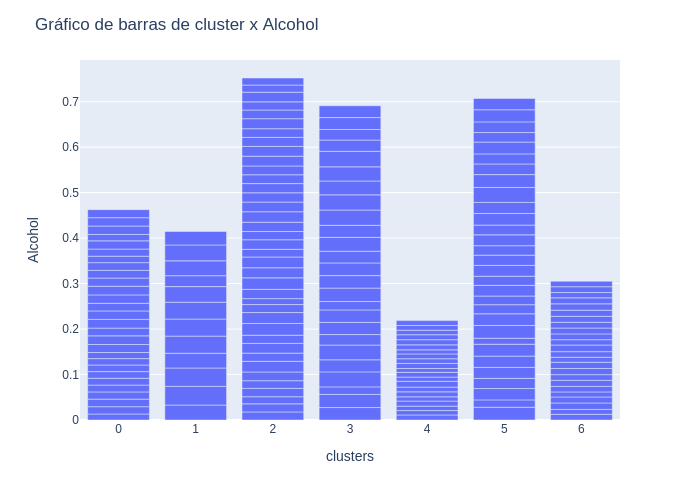

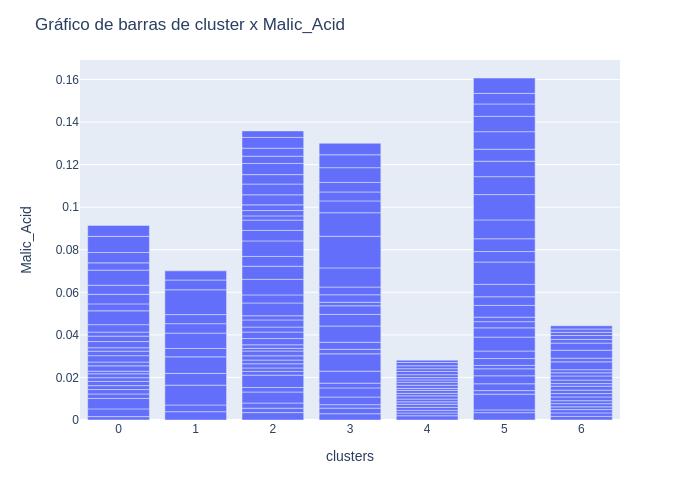

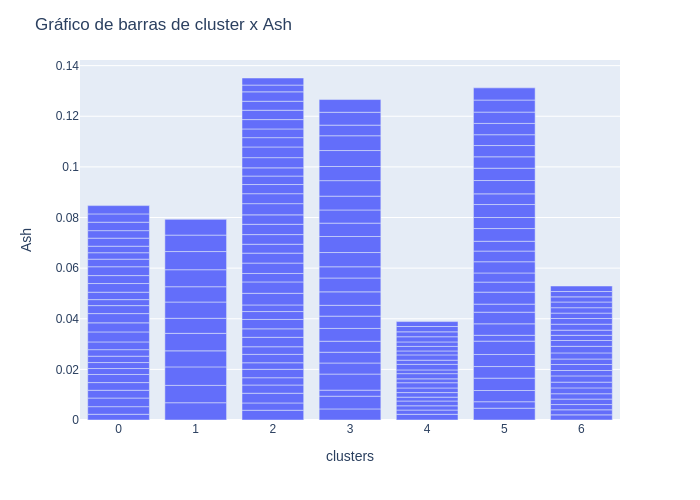

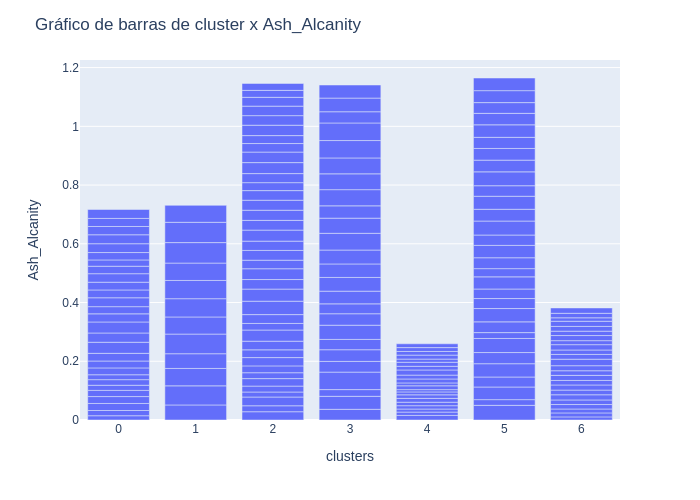

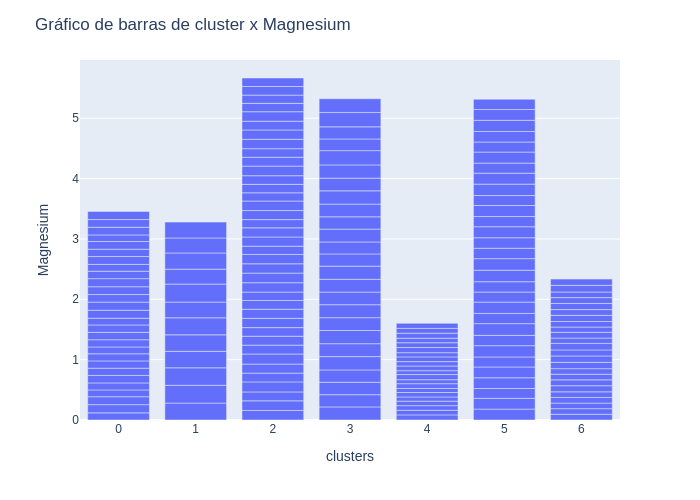

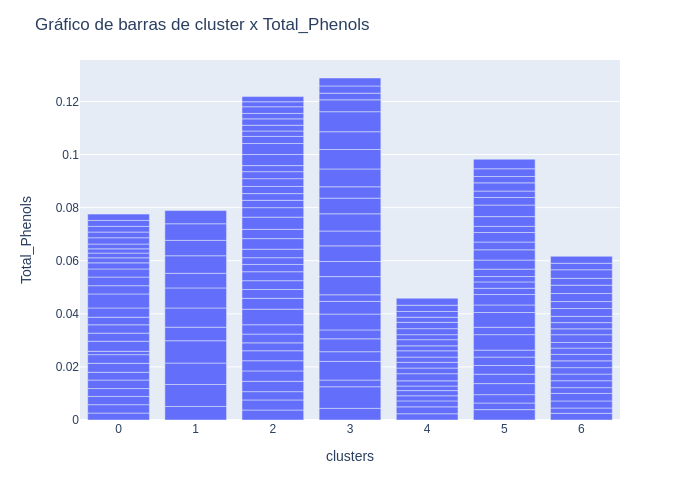

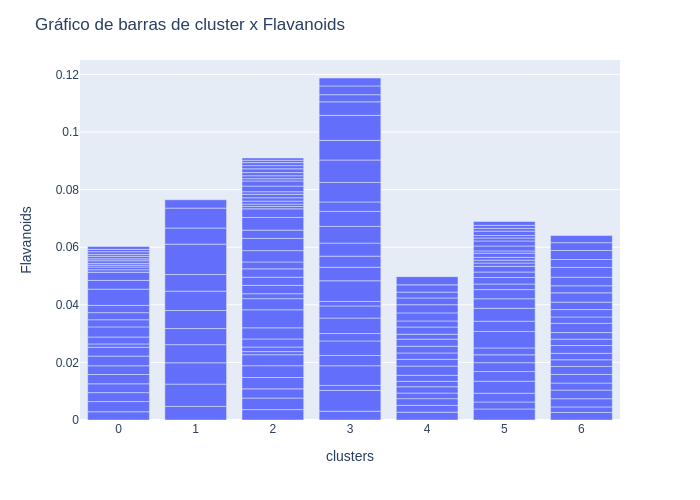

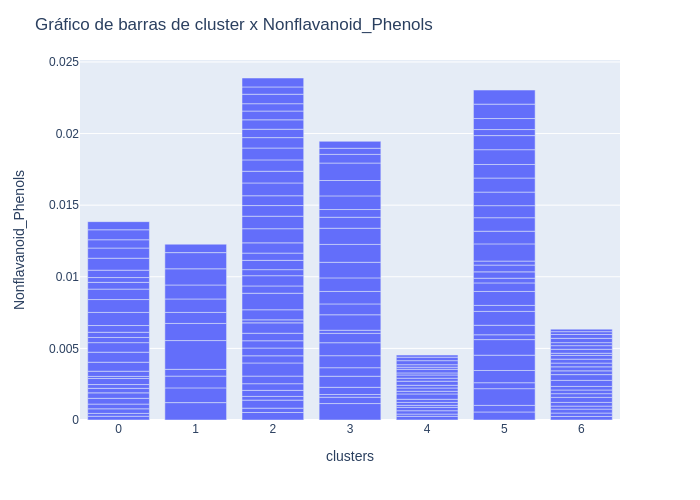

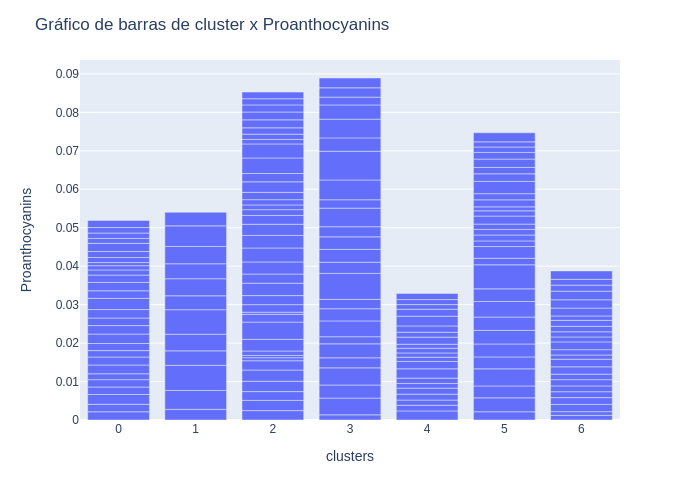

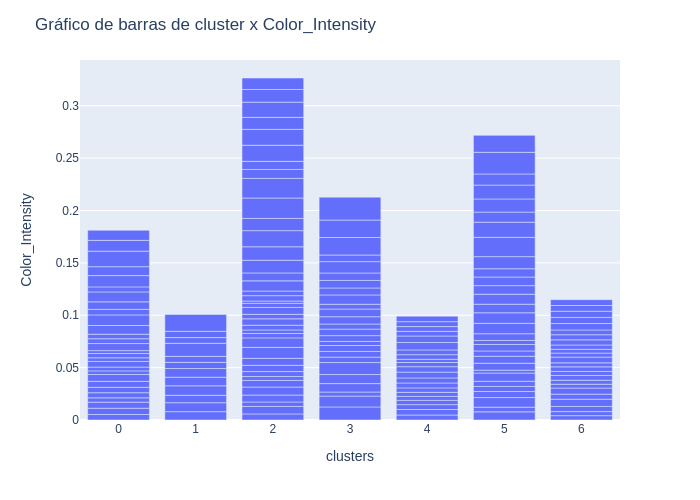

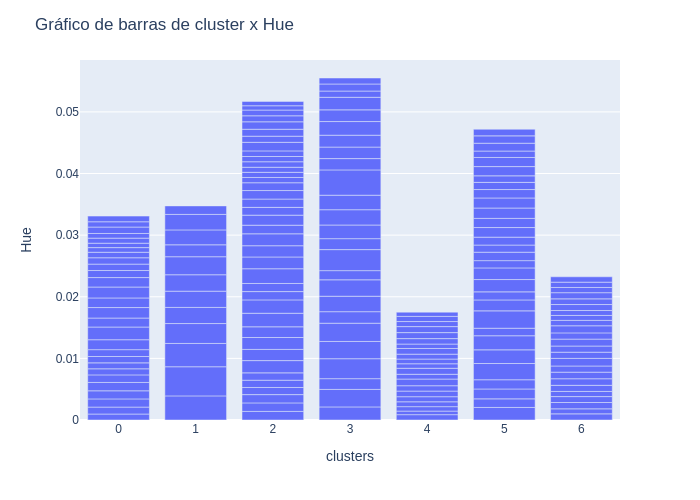

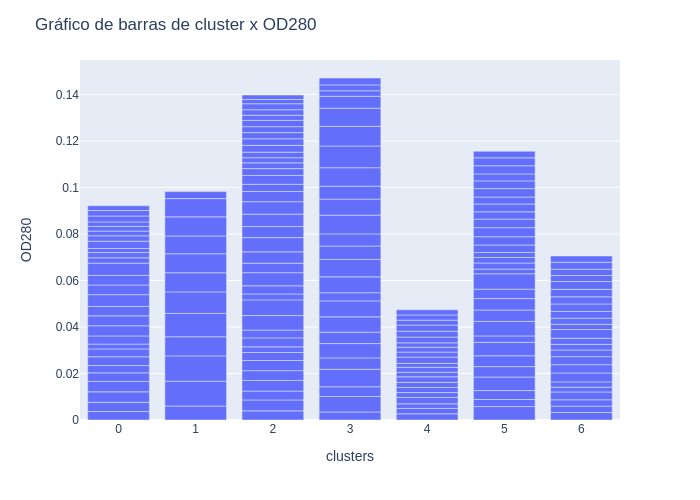

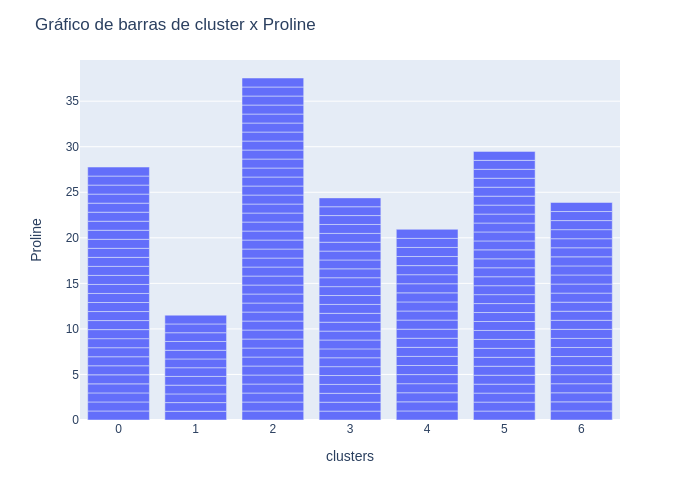

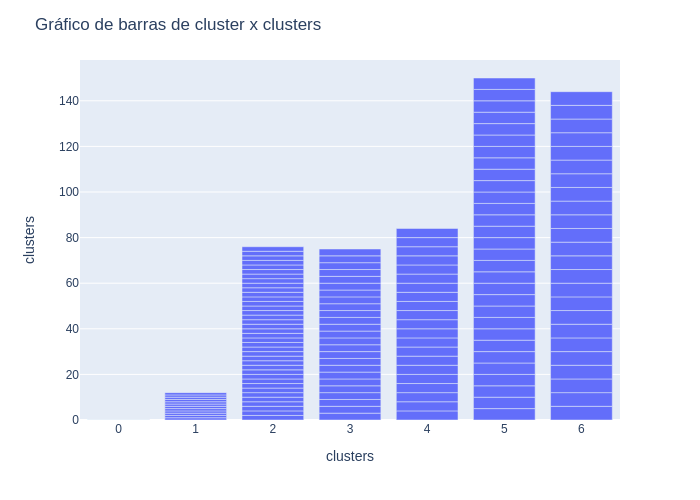

In [37]:
for column in normalized_df:
  fig = px.bar(normalized_df, x='clusters', y=column)
  fig.update_layout(title=f'Gráfico de barras de cluster x {column}') 
  fig.show(renderer="png")

Uma última análise bacana é a seguinte: como os dados estão normalizados, eles seguem a mesma ordem de grandeza e em todas as features, com exceção da Proline, quanto menor a variável, maior a chance desse vinho ter sido clusterizado como 3, ou seja, a barra dos gráficos para cluster = 3 é sempre a que tem menor valor máximo, ou range é o menor.

Já os vinhos classificados como 1, 2 e 6 costumam ter valores em média mais altos que os demais para todas as variáveis.

Já os do tipo 4 e 5 seguem uma regra: os valores do 5 tem sempre seu valor máximo superior ao do tipo 4, com exceção das variáveis Color_Intensity e Proline.

Interessante.

É possível fazerr inúmeras análises, mas a ideia desse documento é apresentar algumas possíveis formas de buscar interpretar um dataset e plotar os gráficos para ajudar em nossa compreensão. 

Espero que tenha sido útil!